In [24]:
import pandas as pd
birddata=pd.read_csv("C:/Ajith/Acadamics/edx/Using python for research/week 4/Bird migration/bird_tracking.csv")
print(birddata.shape)
print(birddata)


(61920, 9)
       Unnamed: 0  altitude               date_time  device_info_serial  \
0               0        71  2013-08-15 00:18:08+00                 851   
1               1        68  2013-08-15 00:48:07+00                 851   
2               2        68  2013-08-15 01:17:58+00                 851   
3               3        73  2013-08-15 01:47:51+00                 851   
4               4        69  2013-08-15 02:17:42+00                 851   
...           ...       ...                     ...                 ...   
61915       61915        11  2014-04-30 22:00:08+00                 833   
61916       61916         6  2014-04-30 22:29:57+00                 833   
61917       61917         5  2014-04-30 22:59:52+00                 833   
61918       61918        16  2014-04-30 23:29:43+00                 833   
61919       61919         9  2014-04-30 23:59:34+00                 833   

        direction   latitude  longitude  speed_2d bird_name  
0     -150.469753  49.4198

Text(0, 0.5, 'Latitude')

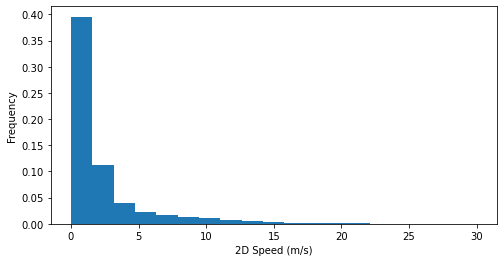

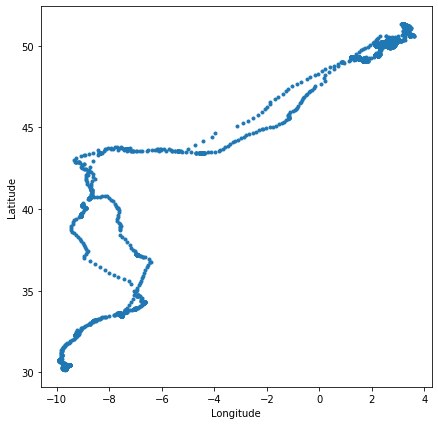

In [25]:
import matplotlib.pyplot as plt
import numpy as np

ix = (birddata["bird_name"]=="Eric")
x, y = birddata.longitude[ix], birddata.latitude[ix]
speed=birddata.speed_2d[ix]

#Check if all the entry in speed array is numeric data
#There are few "NaN" enteries in speed aray
#print(np.isnan(speed))#True if "NaN", False if anything else
#print(np.isnan(speed).any())#True if there is any "NaN", else returns False
#print(np.sum(np.isnan(speed)))#Considers True to be "1" and False to be "0"
ind = np.isnan(speed)

#_____________________________
#There are 85 "NaN" in speed array of "Eric"
plt.figure(figsize=(8,4))
# ~ind denotes taking bitwise complement of each array element.
plt.hist(speed[~ind], bins=np.linspace(0,30,20), density = True, stacked = True)#Plotting those enteries of array whose ind is "true" (i.e, not a "NaN")
#Stacked = True and density = True denotes the y axis is normalized (Integral over the histogram will be equal to one)
#Normed keyword is not in use now a days, instead use stacked =True density = True 
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
#_____________________________


#_____________________________
plt.figure(figsize=(7,7))
plt.plot(x,y,".")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#_____________________________

### Plotting all the three bird's trajectory


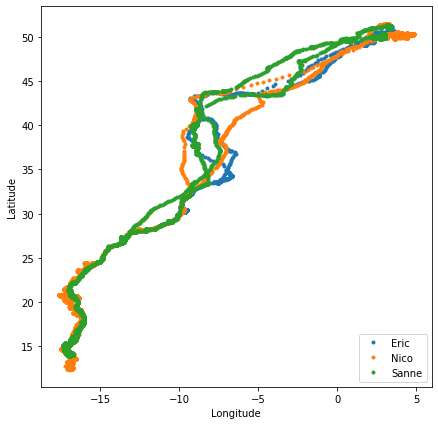

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(7,7))
birddata=pd.read_csv("C:/Ajith/Acadamics/edx/Using python for research/week 4/Bird migration/bird_tracking.csv")
bird_names=pd.unique(birddata.bird_name)
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".",label=bird_name)
    
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

### DATA TIME

In [27]:
import datetime
time_1=datetime.datetime.today()
print("Time 1:",time_1)
time_2=datetime.datetime.today()
print("Time 2:",time_2)
time_2-time_1

Time 1: 2022-07-26 14:32:43.851179
Time 2: 2022-07-26 14:32:43.852180


datetime.timedelta(microseconds=1001)

### Converting string data time stamp into DateTime object

In [28]:
date_str = birddata.date_time[0]
print(type(date_str)) #Checking the type of datetime stamp
date_str[:-3] #We don't need the last three characters in the data time stamp string


#Converting the string time into datatime object
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

<class 'str'>


datetime.datetime(2013, 8, 15, 0, 18, 8)

### Changing everysingle row in our data time stamp into DateTime object

       Unnamed: 0  altitude               date_time  device_info_serial  \
0               0        71  2013-08-15 00:18:08+00                 851   
1               1        68  2013-08-15 00:48:07+00                 851   
2               2        68  2013-08-15 01:17:58+00                 851   
3               3        73  2013-08-15 01:47:51+00                 851   
4               4        69  2013-08-15 02:17:42+00                 851   
...           ...       ...                     ...                 ...   
61915       61915        11  2014-04-30 22:00:08+00                 833   
61916       61916         6  2014-04-30 22:29:57+00                 833   
61917       61917         5  2014-04-30 22:59:52+00                 833   
61918       61918        16  2014-04-30 23:29:43+00                 833   
61919       61919         9  2014-04-30 23:59:34+00                 833   

        direction   latitude  longitude  speed_2d bird_name  \
0     -150.469753  49.419860   2.120

Text(0, 0.5, 'Elapsed time (days)')

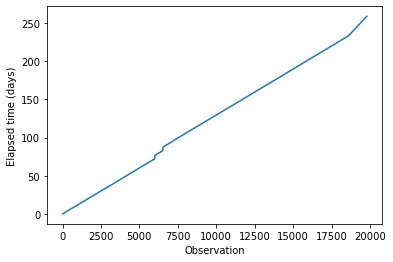

In [29]:
timestamps = []
for k in range(len(birddata)):
    dt = birddata.date_time.iloc[k][:-3]
    timestamps.append(datetime.datetime.strptime(dt, "%Y-%m-%d %H:%M:%S"))
timestamps[0:3]
birddata["timestamp"]=pd.Series(timestamps, index=birddata.index)

#Now coulmn "date_time" is a string and "timestamp" is a datatime object
print(birddata)

#Now doing arthmetic with "timestamp" column
print(birddata.timestamp[4]-birddata.timestamp[3])


#Calculating time elapsed from the beginning of data collection
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time= [time - times[0] for time in times]
print("Amount of days: ", elapsed_time[1000]/datetime.timedelta(days=1))
print("Amount of hours: ", elapsed_time[1000]/datetime.timedelta(hours=1))

plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")

### Daily mean speed of "Eric"

Text(0, 0.5, 'Mean speed (m/s)')

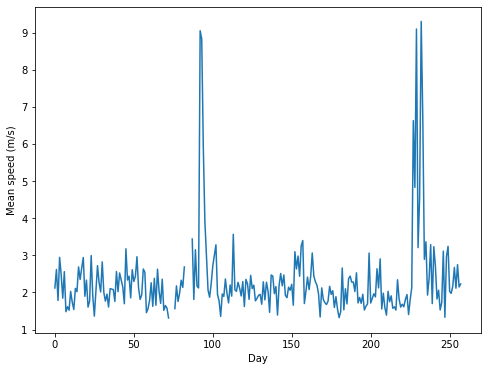

In [30]:
data=birddata[birddata.bird_name == "Eric"]
times=data.timestamp
elapsed_time=[time-times[0] for time in times]
elapsed_days=np.array(elapsed_time)/datetime.timedelta(days=1)

next_day=1
inds=[]
daily_mean_speed=[]
for (i,t) in enumerate(elapsed_days):
    if t<next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day+=1
        inds=[]
        
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")

### Comprehensive check Question1 

In [44]:
data=birddata[birddata.bird_name == "Sanne"]
times=data.timestamp
times

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
                ...        
61915   2014-04-30 22:00:08
61916   2014-04-30 22:29:57
61917   2014-04-30 22:59:52
61918   2014-04-30 23:29:43
61919   2014-04-30 23:59:34
Name: timestamp, Length: 21004, dtype: datetime64[ns]

### Cartopy

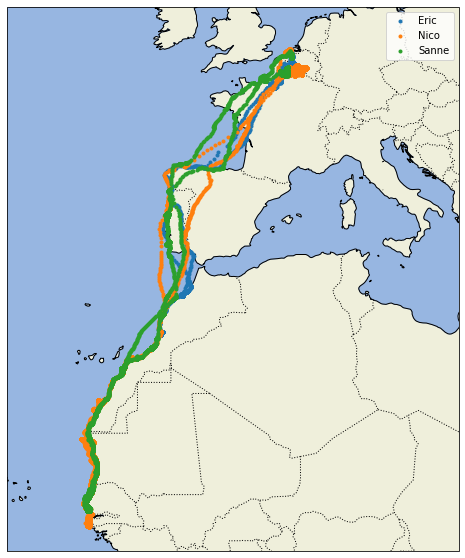

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25,20,52,10))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix=(birddata['bird_name'] == name)
    x,y=birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name)
  
plt.legend()